In [1]:
import os
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Reading and processing dataset 

In [3]:
train_file = 'https://raw.githubusercontent.com/jmnwong/NSL-KDD-Dataset/9d544d0eb9b87d7e2f43ff65733bdb644631d12f/KDDTrain%2B.txt'
test_file = 'https://raw.githubusercontent.com/jmnwong/NSL-KDD-Dataset/9d544d0eb9b87d7e2f43ff65733bdb644631d12f/KDDTest%2B.txt'

In [4]:
# Original KDD dataset feature names obtained from 
# http://kdd.ics.uci.edu/databases/kddcup99/kddcup.names
# http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html

header_names = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 
                'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 
                'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 
                'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 
                'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 
                'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 
                'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 
                'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 
                'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 
                'attack_type', 'success_pred']

In [5]:
# Differentiating between nominal, binary, and numeric features

# root_shell is marked as a continuous feature in the kddcup.names 
# file, but it is supposed to be a binary feature according to the 
# dataset documentation

col_names = np.array(header_names)

nominal_idx = [1, 2, 3]
binary_idx = [6, 11, 13, 14, 20, 21]
numeric_idx = list(set(range(41)).difference(nominal_idx).difference(binary_idx))

nominal_cols = col_names[nominal_idx].tolist()
binary_cols = col_names[binary_idx].tolist()
numeric_cols = col_names[numeric_idx].tolist()

In [6]:
numeric_cols

['duration',
 'src_bytes',
 'dst_bytes',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'num_compromised',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate']

In [7]:
training_attack_types = [
    'apache2 dos',
    'back dos',
    'mailbomb dos',
    'processtable dos',
    'snmpgetattack dos',
    'teardrop dos',
    'smurf dos',
    'land dos',
    'neptune dos',
    'pod dos',
    'udpstorm dos',
    'ps u2r',
    'buffer_overflow u2r',
    'perl u2r',
    'rootkit u2r',
    'loadmodule u2r',
    'xterm u2r',
    'sqlattack u2r',
    'httptunnel u2r',
    'ftp_write r2l',
    'guess_passwd r2l',
    'snmpguess r2l',
    'imap r2l',
    'spy r2l',
    'warezclient r2l',
    'warezmaster r2l',
    'multihop r2l',
    'phf r2l',
    'imap r2l',
    'named r2l',
    'sendmail r2l',
    'xlock r2l',
    'xsnoop r2l',
    'worm r2l',
    'nmap probe',
    'ipsweep probe',
    'portsweep probe',
    'satan probe',
    'mscan probe',
    'saint probe',
    'worm probe'
]

In [8]:
# training_attack_types.txt maps each of the 22 different attacks to 1 of 4 categories
# file obtained from http://kdd.ics.uci.edu/databases/kddcup99/training_attack_types

category = defaultdict(list)
category['benign'].append('normal')

for line in training_attack_types:
    attack, cat = line.strip().split(' ')
    category[cat].append(attack)

attack_mapping = dict((v,k) for k in category for v in category[k])

In [9]:
attack_mapping

{'normal': 'benign',
 'apache2': 'dos',
 'back': 'dos',
 'mailbomb': 'dos',
 'processtable': 'dos',
 'snmpgetattack': 'dos',
 'teardrop': 'dos',
 'smurf': 'dos',
 'land': 'dos',
 'neptune': 'dos',
 'pod': 'dos',
 'udpstorm': 'dos',
 'ps': 'u2r',
 'buffer_overflow': 'u2r',
 'perl': 'u2r',
 'rootkit': 'u2r',
 'loadmodule': 'u2r',
 'xterm': 'u2r',
 'sqlattack': 'u2r',
 'httptunnel': 'u2r',
 'ftp_write': 'r2l',
 'guess_passwd': 'r2l',
 'snmpguess': 'r2l',
 'imap': 'r2l',
 'spy': 'r2l',
 'warezclient': 'r2l',
 'warezmaster': 'r2l',
 'multihop': 'r2l',
 'phf': 'r2l',
 'named': 'r2l',
 'sendmail': 'r2l',
 'xlock': 'r2l',
 'xsnoop': 'r2l',
 'worm': 'probe',
 'nmap': 'probe',
 'ipsweep': 'probe',
 'portsweep': 'probe',
 'satan': 'probe',
 'mscan': 'probe',
 'saint': 'probe'}

## Generating and analyzing train and test sets

> Indented block



In [10]:
train_df = pd.read_csv(train_file, names=header_names)
train_df['attack_category'] = train_df['attack_type'] \
                                .map(lambda x: attack_mapping[x])
train_df.drop(['success_pred'], axis=1, inplace=True)
    
test_df = pd.read_csv(test_file, names=header_names)
test_df['attack_category'] = test_df['attack_type'] \
                                .map(lambda x: attack_mapping[x])
test_df.drop(['success_pred'], axis=1, inplace=True)

In [11]:
train_attack_types = train_df['attack_type'].value_counts()
train_attack_cats = train_df['attack_category'].value_counts()

In [12]:
test_attack_types = test_df['attack_type'].value_counts()
test_attack_cats = test_df['attack_category'].value_counts()

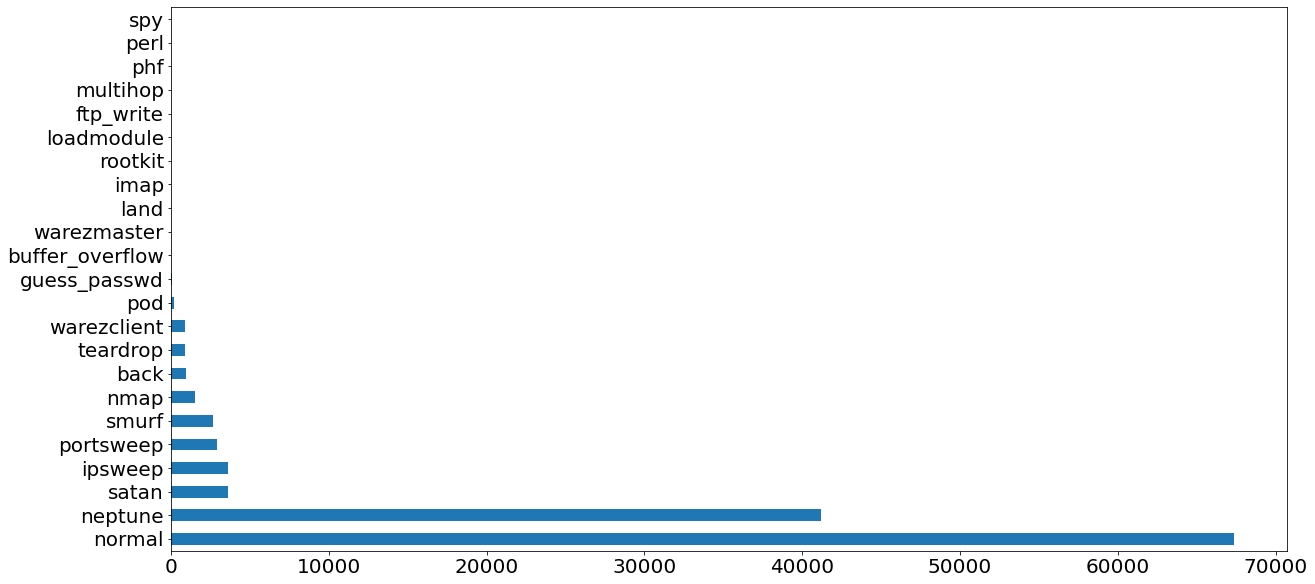

In [13]:
train_attack_types.plot(kind='barh', figsize=(20,10), fontsize=20)

In [14]:
attack_mapping['ipsweep']

'probe'

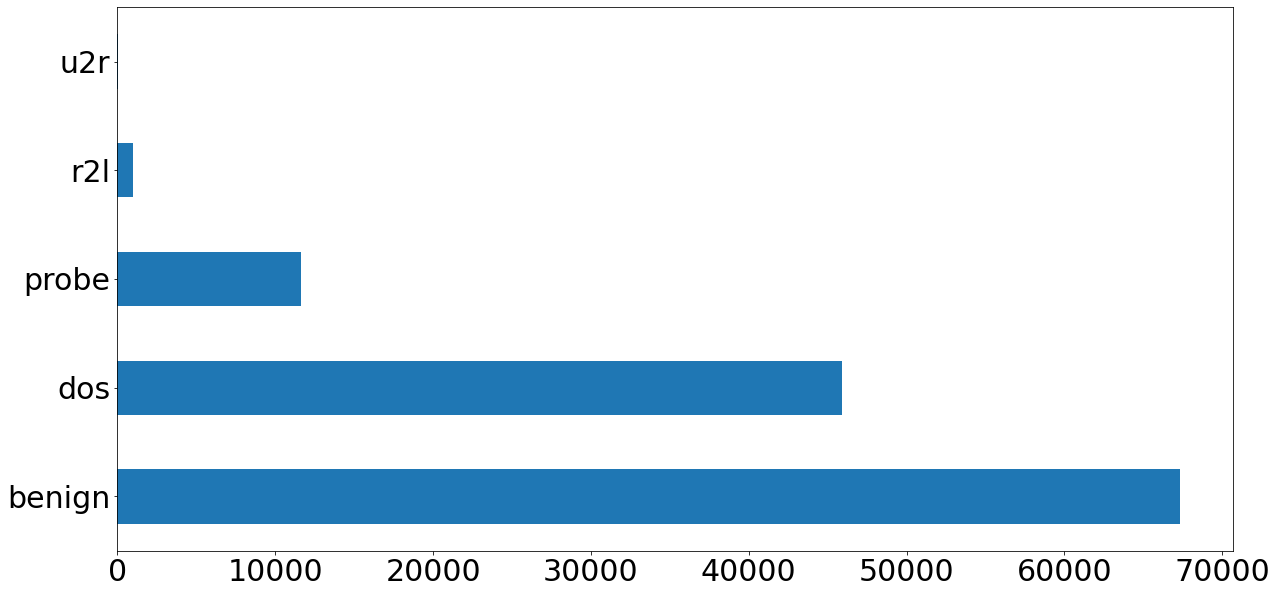

In [15]:
train_attack_cats.plot(kind='barh', figsize=(20,10), fontsize=30)

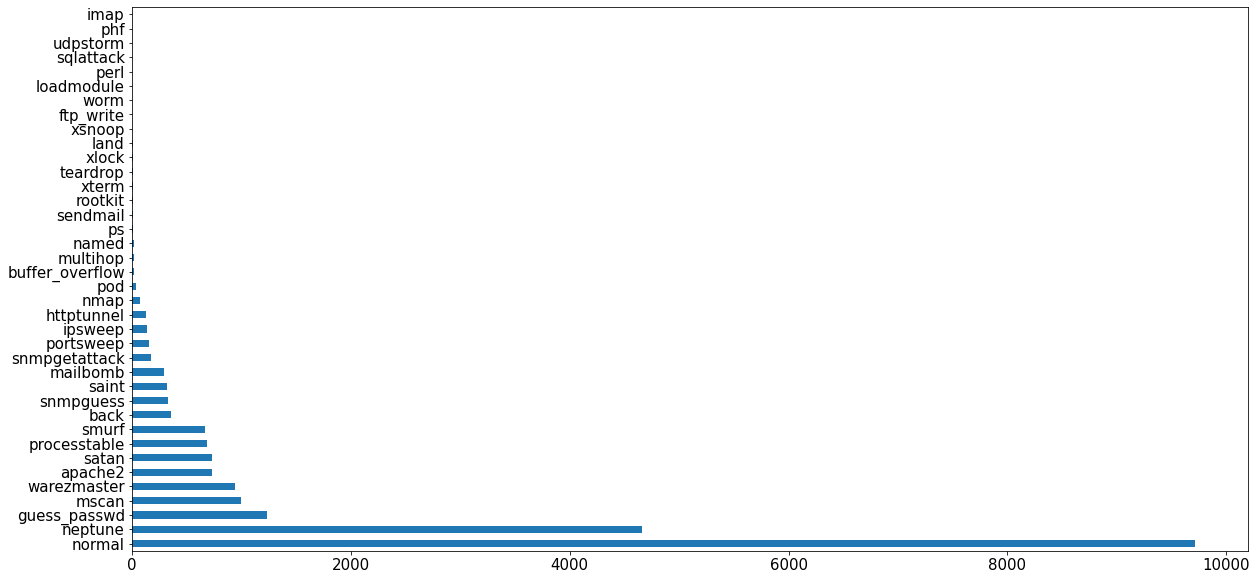

In [16]:
test_attack_types.plot(kind='barh', figsize=(20,10), fontsize=15)

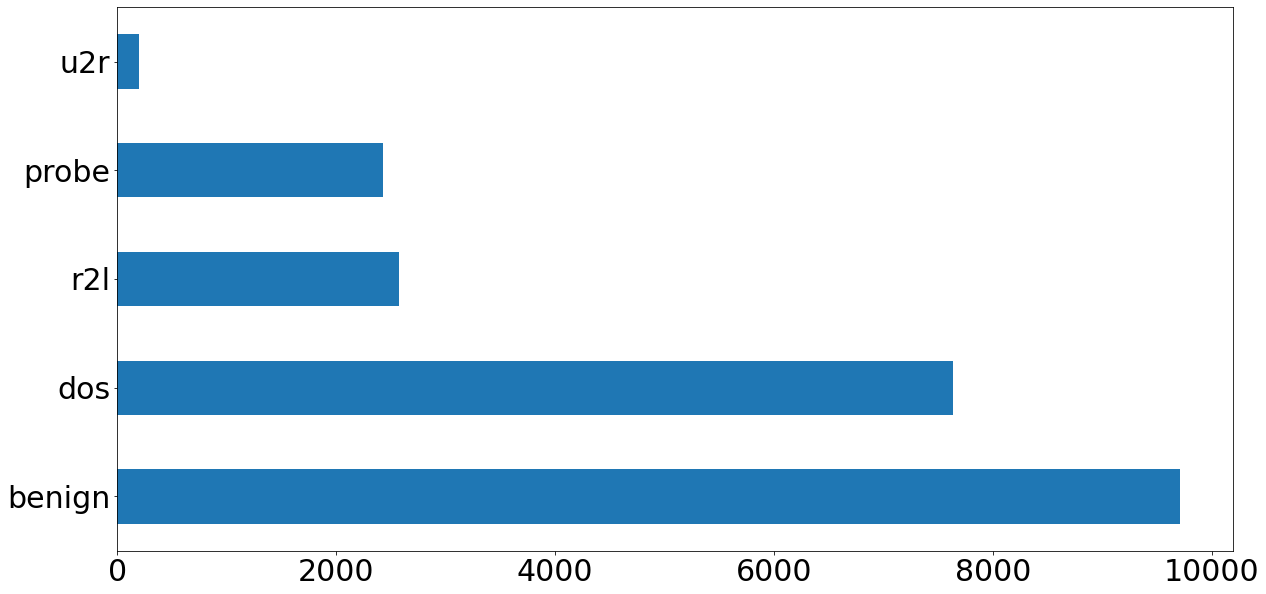

In [17]:
test_attack_cats.plot(kind='barh', figsize=(20,10), fontsize=30)

In [18]:
# Let's take a look at the binary features
# By definition, all of these features should have a min of 0.0 and a max of 1.0

train_df[binary_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
land,125973.0,0.000198,0.014086,0.0,0.0,0.0,0.0,1.0
logged_in,125973.0,0.395736,0.489010,0.0,0.0,0.0,1.0,1.0
root_shell,125973.0,0.001342,0.036603,0.0,0.0,0.0,0.0,1.0
su_attempted,125973.0,0.001103,0.045154,0.0,0.0,0.0,0.0,2.0
is_host_login,125973.0,0.000008,0.002817,0.0,0.0,0.0,0.0,1.0
is_guest_login,125973.0,0.009423,0.096612,0.0,0.0,0.0,0.0,1.0


In [19]:
# Wait a minute... the su_attempted column has a max value of 2.0?

train_df.groupby(['su_attempted']).size()

su_attempted
0    125893
1        21
2        59
dtype: int64

In [20]:
# Let's fix this discrepancy and assume that su_attempted=2 -> su_attempted=0

train_df['su_attempted'].replace(2, 0, inplace=True)
test_df['su_attempted'].replace(2, 0, inplace=True)
train_df.groupby(['su_attempted']).size()

su_attempted
0    125952
1        21
dtype: int64

In [21]:
# Next, we notice that the num_outbound_cmds column only takes on one value!

train_df.groupby(['num_outbound_cmds']).size()

num_outbound_cmds
0    125973
dtype: int64

In [22]:
# Now, that's not a very useful feature - let's drop it from the dataset

train_df.drop('num_outbound_cmds', axis = 1, inplace=True)
test_df.drop('num_outbound_cmds', axis = 1, inplace=True)
numeric_cols.remove('num_outbound_cmds')

## Data preparation

In [23]:
train_Y = train_df['attack_category']
train_x_raw = train_df.drop(['attack_category','attack_type'], axis=1)
test_Y = test_df['attack_category']
test_x_raw = test_df.drop(['attack_category','attack_type'], axis=1)

In [24]:
combined_df_raw = pd.concat([train_x_raw, test_x_raw])
combined_df = pd.get_dummies(combined_df_raw, columns=nominal_cols, drop_first=True)

train_x = combined_df[:len(train_x_raw)]
test_x = combined_df[len(train_x_raw):]

# Store dummy variable feature names
dummy_variables = list(set(train_x)-set(combined_df_raw))

In [25]:
dummy_variables

['service_ldap',
 'flag_REJ',
 'protocol_type_udp',
 'service_X11',
 'service_link',
 'service_daytime',
 'service_rje',
 'service_http_2784',
 'flag_S0',
 'service_courier',
 'service_http_8001',
 'flag_SH',
 'service_nnsp',
 'service_iso_tsap',
 'service_login',
 'service_netbios_dgm',
 'service_efs',
 'service_sunrpc',
 'service_name',
 'service_echo',
 'service_supdup',
 'service_http',
 'service_ftp_data',
 'service_netstat',
 'service_aol',
 'service_eco_i',
 'service_vmnet',
 'service_ctf',
 'service_domain',
 'service_pop_3',
 'protocol_type_tcp',
 'service_ecr_i',
 'flag_S3',
 'service_red_i',
 'service_mtp',
 'flag_RSTR',
 'service_printer',
 'service_http_443',
 'service_remote_job',
 'flag_SF',
 'service_time',
 'service_tftp_u',
 'service_bgp',
 'service_harvest',
 'service_telnet',
 'service_domain_u',
 'service_whois',
 'flag_S2',
 'service_tim_i',
 'flag_RSTOS0',
 'service_netbios_ssn',
 'flag_RSTO',
 'service_private',
 'service_Z39_50',
 'service_gopher',
 'service_au

In [26]:
train_x.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.00000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,0.08917,0.012399,0.000818,0.019218,0.276655,0.002897,0.001008,0.000389,0.594929,0.002151
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,0.28499,0.110661,0.028583,0.137292,0.447346,0.053750,0.031736,0.019719,0.490908,0.046332
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
# Example statistics for the 'duration' feature before scaling
train_x['duration'].describe()

count    125973.00000
mean        287.14465
std        2604.51531
min           0.00000
25%           0.00000
50%           0.00000
75%           0.00000
max       42908.00000
Name: duration, dtype: float64

In [28]:
# Experimenting with StandardScaler on the single 'duration' feature
from sklearn.preprocessing import StandardScaler

durations = train_x['duration'].values.reshape(-1, 1)
standard_scaler = StandardScaler().fit(durations)
scaled_durations = standard_scaler.transform(durations)
pd.Series(scaled_durations.flatten()).describe()

count    1.259730e+05
mean     2.549477e-17
std      1.000004e+00
min     -1.102492e-01
25%     -1.102492e-01
50%     -1.102492e-01
75%     -1.102492e-01
max      1.636428e+01
dtype: float64

In [29]:
# Experimenting with MinMaxScaler on the single 'duration' feature
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler().fit(durations)
min_max_scaled_durations = min_max_scaler.transform(durations)
pd.Series(min_max_scaled_durations.flatten()).describe()

count    125973.000000
mean          0.006692
std           0.060700
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
dtype: float64

In [30]:
# Experimenting with RobustScaler on the single 'duration' feature
from sklearn.preprocessing import RobustScaler

min_max_scaler = RobustScaler().fit(durations)
robust_scaled_durations = min_max_scaler.transform(durations)
pd.Series(robust_scaled_durations.flatten()).describe()

count    125973.00000
mean        287.14465
std        2604.51531
min           0.00000
25%           0.00000
50%           0.00000
75%           0.00000
max       42908.00000
dtype: float64

In [31]:
# Let's proceed with StandardScaler- Apply to all the numeric columns

standard_scaler = StandardScaler().fit(train_x[numeric_cols])

train_x[numeric_cols] = \
    standard_scaler.transform(train_x[numeric_cols])

test_x[numeric_cols] = \
    standard_scaler.transform(test_x[numeric_cols])

In [32]:
train_x.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
count,1.259730e+05,1.259730e+05,1.259730e+05,125973.000000,1.259730e+05,1.259730e+05,1.259730e+05,1.259730e+05,125973.000000,1.259730e+05,...,125973.00000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,2.549477e-17,-4.512349e-19,7.614590e-19,0.000198,4.230328e-19,4.455945e-18,-2.244894e-17,2.989431e-18,0.395736,-6.549957e-18,...,0.08917,0.012399,0.000818,0.019218,0.276655,0.002897,0.001008,0.000389,0.594929,0.002151
std,1.000004e+00,1.000004e+00,1.000004e+00,0.014086,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,0.489010,1.000004e+00,...,0.28499,0.110661,0.028583,0.137292,0.447346,0.053750,0.031736,0.019719,0.490908,0.046332
min,-1.102492e-01,-7.762241e-03,-4.918644e-03,0.000000,-8.948642e-02,-7.735985e-03,-9.507567e-02,-2.702282e-02,0.000000,-1.166364e-02,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.102492e-01,-7.762241e-03,-4.918644e-03,0.000000,-8.948642e-02,-7.735985e-03,-9.507567e-02,-2.702282e-02,0.000000,-1.166364e-02,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.102492e-01,-7.754745e-03,-4.918644e-03,0.000000,-8.948642e-02,-7.735985e-03,-9.507567e-02,-2.702282e-02,0.000000,-1.166364e-02,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,-1.102492e-01,-7.715224e-03,-4.790326e-03,0.000000,-8.948642e-02,-7.735985e-03,-9.507567e-02,-2.702282e-02,1.000000,-1.166364e-02,...,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.636428e+01,2.350675e+02,3.257486e+02,1.000000,1.174348e+01,2.088191e+02,3.571955e+01,1.104972e+02,1.000000,3.123689e+02,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
train_Y_bin = train_Y.apply(lambda x: 0 if x is 'benign' else 1)
test_Y_bin = test_Y.apply(lambda x: 0 if x is 'benign' else 1)

In [34]:
# 5-class classification version
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, zero_one_loss

classifier = DecisionTreeClassifier(random_state=17)
classifier.fit(train_x, train_Y)

pred_y = classifier.predict(test_x)

results = confusion_matrix(test_Y, pred_y)
error = zero_one_loss(test_Y, pred_y)

print(results)
print(error)

[[9365   56  289    1    0]
 [1541 5998   97    0    0]
 [ 677  220 1526    0    0]
 [2278    1   14  277    4]
 [ 175    0    5    5   15]]
0.2378903477643719


In [35]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=1, n_jobs=-1)
classifier.fit(train_x, train_Y)

pred_y = classifier.predict(test_x)

results = confusion_matrix(test_Y, pred_y)
error = zero_one_loss(test_Y, pred_y)

print(results)
print(error)

[[9457   57  193    2    2]
 [1675 5894   67    0    0]
 [ 670  156 1597    0    0]
 [2369    2   37  126   40]
 [ 176    0    4    7   13]]
0.24205997161107173


In [36]:
from sklearn.svm import LinearSVC

classifier = LinearSVC()
classifier.fit(train_x, train_Y)

pred_y = classifier.predict(test_x)

results = confusion_matrix(test_Y, pred_y)
error = zero_one_loss(test_Y, pred_y)

print(results)
print(error)

[[9009  292  407    2    1]
 [1971 5655   10    0    0]
 [ 717  122 1497   87    0]
 [2472    1    1  100    0]
 [ 183    2    0    4   11]]
0.27821149751596874


[link text](https://)## Dealing with class imbalance

In [37]:
!pip install imbalanced-learn==0.9.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 199 kB 7.8 MB/s 
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.1
    Uninstalling imbalanced-learn-0.8.1:
      Successfully uninstalled imbalanced-learn-0.8.1


In [38]:
test_Y.value_counts().apply(lambda x: x/float(len(test_Y)))

benign    0.430758
dos       0.338715
r2l       0.114177
probe     0.107479
u2r       0.008872
Name: attack_category, dtype: float64

In [39]:
train_Y.value_counts().apply(lambda x: x/float(len(train_Y)))

benign    0.534583
dos       0.364578
probe     0.092528
r2l       0.007899
u2r       0.000413
Name: attack_category, dtype: float64

In [40]:
print(pd.Series(train_Y).value_counts())

benign    67343
dos       45927
probe     11656
r2l         995
u2r          52
Name: attack_category, dtype: int64


In [41]:
try:
    from sklearn.utils import safe_indexing
except ImportError:
    from sklearn.utils import _safe_indexing

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=0)
train_x_sm, train_Y_sm = sm.fit_resample(train_x, train_Y)
print(pd.Series(train_Y_sm).value_counts())

benign    67343
dos       67343
r2l       67343
probe     67343
u2r       67343
Name: attack_category, dtype: int64


In [42]:
from imblearn.under_sampling import RandomUnderSampler

mean_class_size = int(pd.Series(train_Y).value_counts().sum()/5)

ratio = {'benign': mean_class_size,
         'dos': mean_class_size,
         'probe': mean_class_size,
         'r2l': mean_class_size,
         'u2r': mean_class_size}

rus = RandomUnderSampler(random_state=0, replacement=True)
train_x_rus, train_Y_rus = rus.fit_resample(train_x_sm, train_Y_sm)
print(pd.Series(train_Y_rus).value_counts())

benign    67343
dos       67343
probe     67343
r2l       67343
u2r       67343
Name: attack_category, dtype: int64


In [43]:
train_x_rus = train_x
train_Y_rus = train_Y

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, zero_one_loss

classifier = DecisionTreeClassifier(random_state=17)
classifier.fit(train_x_rus, train_Y_rus)

pred_y = classifier.predict(test_x)

results = confusion_matrix(test_Y, pred_y)
error = zero_one_loss(test_Y, pred_y)

print(results)
print(error)

[[9365   56  289    1    0]
 [1541 5998   97    0    0]
 [ 677  220 1526    0    0]
 [2278    1   14  277    4]
 [ 175    0    5    5   15]]
0.2378903477643719


## Attempting unsupervised learning

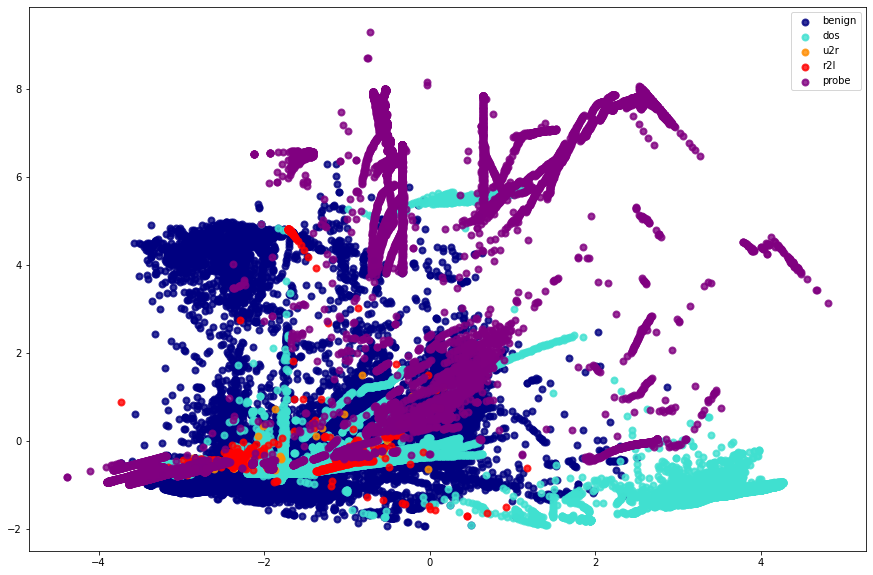

In [45]:
# First, let's visualize the dataset (only numeric cols)

from sklearn.decomposition import PCA

# Use PCA to reduce dimensionality so we can visualize the dataset on a 2d plot
pca = PCA(n_components=2)
train_x_pca_cont = pca.fit_transform(train_x[numeric_cols])

plt.figure(figsize=(15,10))
colors = ['navy', 'turquoise', 'darkorange', 'red', 'purple']

for color, cat in zip(colors, category.keys()):
    plt.scatter(train_x_pca_cont[train_Y==cat, 0], train_x_pca_cont[train_Y==cat, 1],
                color=color, alpha=.8, lw=2, label=cat)
plt.legend(loc='best', shadow=False, scatterpoints=1)

plt.show()

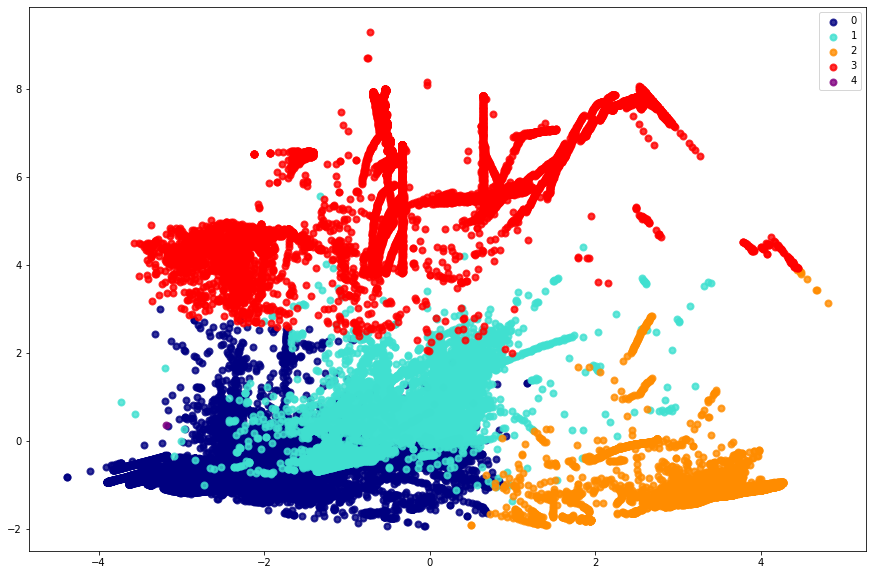

In [46]:
# Apply k-means (k=5, only using numeric cols) + PCA + plot

from sklearn.cluster import KMeans

# Fit the training data to a k-means clustering estimator model
kmeans = KMeans(n_clusters=5, random_state=17).fit(train_x[numeric_cols])

# Retrieve the labels assigned to each training sample
kmeans_y = kmeans.labels_

# Plot in 2d with train_x_pca_cont
plt.figure(figsize=(15,10))
colors = ['navy', 'turquoise', 'darkorange', 'red', 'purple']

for color, cat in zip(colors, range(5)):
    plt.scatter(train_x_pca_cont[kmeans_y==cat, 0],
                train_x_pca_cont[kmeans_y==cat, 1],
                color=color, alpha=.8, lw=2, label=cat)
plt.legend(loc='best', shadow=False, scatterpoints=1)

plt.show()

In [47]:
print('Total number of features: {}'.format(len(train_x.columns)))
print('Total number of continuous features: {}'.format(len(train_x[numeric_cols].columns)))

Total number of features: 118
Total number of continuous features: 31


In [48]:
from sklearn.metrics import completeness_score,\
    homogeneity_score, v_measure_score

print('Completeness: {}'.format(completeness_score(test_Y, pred_y)))
print('Homogeneity: {}'.format(homogeneity_score(test_Y, pred_y)))
print('V-measure: {}'.format(v_measure_score(test_Y, pred_y)))

Completeness: 0.5580802809824347
Homogeneity: 0.4089119976241967
V-measure: 0.4719907854073642


## Using "Attribute Ratio" (AR) feature selection

In [49]:
averages = train_df.loc[:, numeric_cols].mean()

In [50]:
averages_per_class = train_df[numeric_cols+['attack_category']].groupby('attack_category').mean()

In [51]:
AR = {}
for col in numeric_cols:
    AR[col] = max(averages_per_class[col])/averages[col]

In [52]:
AR

{'duration': 7.225829157212557,
 'src_bytes': 8.464064204948945,
 'dst_bytes': 9.154854355343401,
 'wrong_fragment': 2.742896335488928,
 'urgent': 173.03983516483518,
 'hot': 40.77451681709518,
 'num_failed_logins': 46.03855641845592,
 'num_compromised': 4.338539274983927,
 'num_root': 2.6091432537726016,
 'num_file_creations': 62.23362492770388,
 'num_shells': 326.11353550295854,
 'num_access_files': 4.694879248658319,
 'count': 2.1174082949142403,
 'srv_count': 1.1773191099992069,
 'serror_rate': 2.6310546426370274,
 'srv_serror_rate': 2.6432463184901596,
 'rerror_rate': 3.645586087828456,
 'srv_rerror_rate': 3.6677418023254273,
 'same_srv_rate': 1.5079612006047387,
 'diff_srv_rate': 4.069085485070197,
 'srv_diff_host_rate': 3.0815657101103833,
 'dst_host_count': 1.3428596865228266,
 'dst_host_srv_count': 1.6453161847397422,
 'dst_host_same_srv_rate': 1.5575788279743736,
 'dst_host_diff_srv_rate': 4.8373418489739075,
 'dst_host_same_src_port_rate': 4.393080378884036,
 'dst_host_srv_d

In [53]:
def binary_AR(df, col):
    series_zero = train_df[train_df[col] == 0].groupby('attack_category').size()
    series_one = train_df[train_df[col] == 1].groupby('attack_category').size()
    return max(series_one/series_zero)

In [54]:
# Recreating dataframes with 2-class and 5-class labels

labels2 = ['normal', 'attack']
labels5 = ['normal', 'dos', 'probe', 'r2l', 'u2r']

train_df = pd.read_csv(train_file, names=header_names)
train_df['attack_category'] = train_df['attack_type'] \
                                .map(lambda x: attack_mapping[x])
train_df.drop(['success_pred'], axis=1, inplace=True)
    
test_df = pd.read_csv(test_file, names=header_names)
test_df['attack_category'] = test_df['attack_type'] \
                                .map(lambda x: attack_mapping[x])
test_df.drop(['success_pred'], axis=1, inplace=True)

train_attack_types = train_df['attack_type'].value_counts()
train_attack_cats = train_df['attack_category'].value_counts()
test_attack_types = test_df['attack_type'].value_counts()
test_attack_cats = test_df['attack_category'].value_counts()

In [55]:
train_df['su_attempted'].replace(2, 0, inplace=True)
test_df['su_attempted'].replace(2, 0, inplace=True)
train_df.drop('num_outbound_cmds', axis = 1, inplace=True)
test_df.drop('num_outbound_cmds', axis = 1, inplace=True)

In [56]:
train_df['labels2'] = train_df.apply(lambda x: 'normal' if 'normal' in x['attack_type'] else 'attack', axis=1)
test_df['labels2'] = test_df.apply(lambda x: 'normal' if 'normal' in x['attack_type'] else 'attack', axis=1)

combined_df = pd.concat([train_df, test_df])
original_cols = combined_df.columns

combined_df = pd.get_dummies(combined_df, columns=nominal_cols, drop_first=True)

added_cols = set(combined_df.columns) - set(original_cols)
added_cols= list(added_cols)

In [57]:
combined_df.attack_category = pd.Categorical(combined_df.attack_category)
combined_df.labels2 = pd.Categorical(combined_df.labels2)

combined_df['labels5'] = combined_df['attack_category'].cat.codes
combined_df['labels2'] = combined_df['labels2'].cat.codes

In [58]:
train_df = combined_df[:len(train_df)]
test_df = combined_df[len(train_df):]

In [59]:
for col in binary_cols+dummy_variables:
    cur_AR = binary_AR(train_df, col)
    if cur_AR:
        AR[col] = cur_AR

In [60]:
train_df[train_df.service_Z39_50 == 1].groupby('attack_category').size()

attack_category
benign      0
dos       851
probe      11
r2l         0
u2r         0
dtype: int64

In [61]:
len(binary_cols+added_cols)

87

In [62]:
import operator
AR = dict((k, v) for k,v in AR.items() if not np.isnan(v))
sorted_AR = sorted(AR.items(), key=lambda x:x[1], reverse=True)

In [63]:
sorted_AR

[('protocol_type_tcp', inf),
 ('num_shells', 326.11353550295854),
 ('urgent', 173.03983516483518),
 ('num_file_creations', 62.23362492770388),
 ('flag_SF', 51.0),
 ('num_failed_logins', 46.03855641845592),
 ('hot', 40.77451681709518),
 ('logged_in', 10.569767441860465),
 ('dst_bytes', 9.154854355343401),
 ('src_bytes', 8.464064204948945),
 ('duration', 7.225829157212557),
 ('dst_host_srv_diff_host_rate', 5.756880682756422),
 ('dst_host_diff_srv_rate', 4.8373418489739075),
 ('num_access_files', 4.694879248658319),
 ('dst_host_same_src_port_rate', 4.393080378884036),
 ('num_compromised', 4.338539274983927),
 ('diff_srv_rate', 4.069085485070197),
 ('dst_host_srv_rerror_rate', 3.66792052796591),
 ('srv_rerror_rate', 3.6677418023254273),
 ('rerror_rate', 3.645586087828456),
 ('dst_host_rerror_rate', 3.2795669242444374),
 ('srv_diff_host_rate', 3.0815657101103833),
 ('flag_S0', 2.965034965034965),
 ('wrong_fragment', 2.742896335488928),
 ('dst_host_srv_serror_rate', 2.673159595714105),
 ('sr

In [64]:
# Only keep features with AR value >= 0.01

features_to_use = []
for x,y in sorted_AR:
    if y >= 0.01:
        features_to_use.append(x)
        
features_to_use

['protocol_type_tcp',
 'num_shells',
 'urgent',
 'num_file_creations',
 'flag_SF',
 'num_failed_logins',
 'hot',
 'logged_in',
 'dst_bytes',
 'src_bytes',
 'duration',
 'dst_host_srv_diff_host_rate',
 'dst_host_diff_srv_rate',
 'num_access_files',
 'dst_host_same_src_port_rate',
 'num_compromised',
 'diff_srv_rate',
 'dst_host_srv_rerror_rate',
 'srv_rerror_rate',
 'rerror_rate',
 'dst_host_rerror_rate',
 'srv_diff_host_rate',
 'flag_S0',
 'wrong_fragment',
 'dst_host_srv_serror_rate',
 'srv_serror_rate',
 'serror_rate',
 'dst_host_serror_rate',
 'num_root',
 'count',
 'service_telnet',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'service_ftp_data',
 'same_srv_rate',
 'dst_host_count',
 'service_http',
 'srv_count',
 'root_shell',
 'service_private',
 'service_eco_i',
 'is_guest_login',
 'service_ftp',
 'flag_REJ',
 'flag_RSTR',
 'protocol_type_udp',
 'service_other',
 'service_domain_u',
 'service_smtp',
 'service_ecr_i',
 'flag_RSTO',
 'service_finger',
 'flag_SH',
 'service_Z

In [65]:
len(features_to_use)

76

In [66]:
len(sorted_AR) - len(features_to_use)

42

In [67]:
train_df_trimmed = train_df[features_to_use]
test_df_trimmed = test_df[features_to_use]

In [68]:
numeric_cols_to_use = list(set(numeric_cols).intersection(features_to_use))

In [69]:
# Rescaling is necessary after reducing dimensions

standard_scaler = StandardScaler()

train_df_trimmed[numeric_cols_to_use] = standard_scaler.fit_transform(train_df_trimmed[numeric_cols_to_use])
test_df_trimmed[numeric_cols_to_use] = standard_scaler.transform(test_df_trimmed[numeric_cols_to_use])

## Applying more ensembling

In [70]:
kmeans = KMeans(n_clusters=8, random_state=17)
kmeans.fit(train_df_trimmed[numeric_cols_to_use])
kmeans_train_y = kmeans.labels_

In [71]:
pd.crosstab(kmeans_train_y, train_Y_bin)

attack_category,0,1
row_0,,
0,63569,6457
1,2784,11443
2,126,34700
3,1,0
4,628,4335
5,167,757
6,0,884
7,68,54


In [72]:
train_df['kmeans_y'] = kmeans_train_y
train_df_trimmed['kmeans_y'] = kmeans_train_y

In [73]:
kmeans_test_y = kmeans.predict(test_df_trimmed[numeric_cols_to_use])
test_df['kmeans_y'] = kmeans_test_y

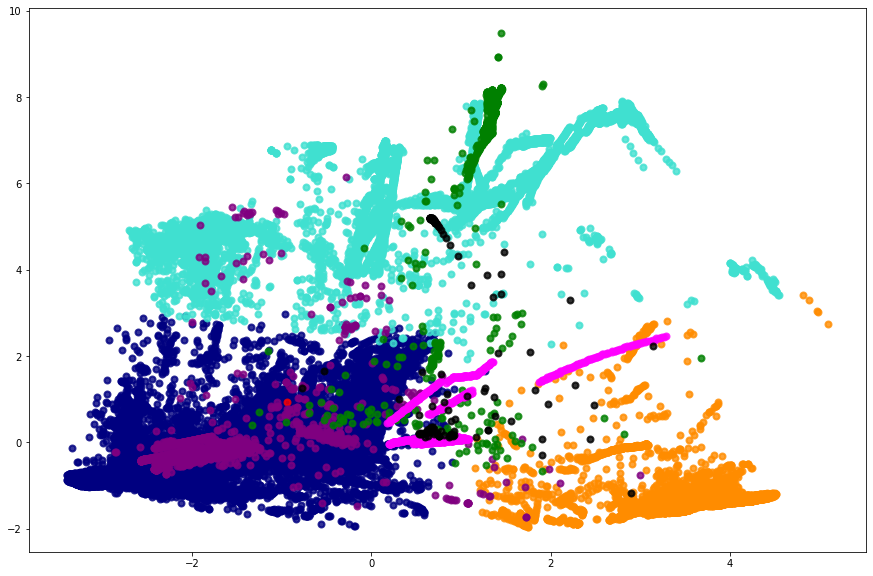

In [74]:
pca8 = PCA(n_components=2)
train_df_trimmed_pca8 = pca8.fit_transform(train_df_trimmed)

plt.figure(figsize=(15,10))

colors8 = ['navy', 'turquoise', 'darkorange', 'red', 'purple', 'green', 'magenta', 'black']
labels8 = [0,1,2,3,4,5,6,7]

for color, cat in zip(colors8, labels8):
    plt.scatter(train_df_trimmed_pca8[train_df.kmeans_y==cat, 0], train_df_trimmed_pca8[train_df.kmeans_y==cat, 1],
                color=color, alpha=.8, lw=2, label=cat)

In [75]:
pd.crosstab(test_df.kmeans_y, test_df.labels2)

labels2,0,1
kmeans_y,,
0,4795,9515
1,5131,87
2,1997,6
4,427,51
5,1,10
6,8,37
7,474,5


In [76]:
# Ensembling strategy

# 1.	For clusters that have an aggregate size of fewer than 200 samples, we consider them outliers and assign them the attack label.

# 2.	For clusters with more than 95% of samples belonging to a single class, (either attack or benign) we assign the dominant label to the entire cluster.

# 3.	For each of the remaining clusters, we train a separate random forest classifier

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

### Cluster 0 - Random Forest Classifier (Strategy Option 3)

In [78]:
train_y0 = train_df[train_df.kmeans_y==0]
test_y0 = test_df[test_df.kmeans_y==0]
rfc = RandomForestClassifier(n_estimators=500, max_depth=20, random_state=17).fit(train_y0.drop(['labels2', 'labels5', 'kmeans_y', 'attack_category', 'attack_type'], axis=1), train_y0['labels2'])
pred_y0 = rfc.predict(test_y0.drop(['labels2', 'labels5', 'kmeans_y', 'attack_category', 'attack_type'], axis=1))
print("cluster {} score is {}, {}".format(0, accuracy_score(pred_y0, test_y0['labels2']), accuracy_score(pred_y0, test_y0['labels2'], normalize=False)))

print(confusion_matrix(test_y0['labels2'], pred_y0))

cluster 0 score is 0.7673654786862334, 10981
[[1618 3177]
 [ 152 9363]]


### Cluster 1 - Dominant Label Zero (Strategy Option 2)

In [79]:
print(confusion_matrix(test_df[test_df.kmeans_y==1]['labels2'], np.zeros(len(test_df[test_df.kmeans_y==1]))))

[[5131    0]
 [  87    0]]


### Cluster 2 - Dominant Label Zero (Strategy Option 2)

In [80]:
print(confusion_matrix(test_df[test_df.kmeans_y==2]['labels2'], np.zeros(len(test_df[test_df.kmeans_y==2]))))

[[1997    0]
 [   6    0]]


### Cluster 3 - Empty Cluster

### Cluster 4 - Random Forest Classifier (Strategy Option 3)

In [81]:
train_y0 = train_df[train_df.kmeans_y==4]
test_y0 = test_df[test_df.kmeans_y==4]
rfc = RandomForestClassifier(n_estimators=500, max_depth=20, random_state=17).fit(train_y0.drop(['labels2', 'labels5', 'kmeans_y', 'attack_category', 'attack_type'], axis=1), train_y0['labels2'])
pred_y0 = rfc.predict(test_y0.drop(['labels2', 'labels5', 'kmeans_y', 'attack_category', 'attack_type'], axis=1))
print("cluster {} score is {}, {}".format(4, accuracy_score(pred_y0, test_y0['labels2']), accuracy_score(pred_y0, test_y0['labels2'], normalize=False)))

print(confusion_matrix(test_y0['labels2'], pred_y0))

cluster 4 score is 0.9309623430962343, 445
[[405  22]
 [ 11  40]]


### Cluster 5 - Outlier/Attack (Strategy Option 1)

In [82]:
print(confusion_matrix(test_df[test_df.kmeans_y==5]['labels2'], np.ones(len(test_df[test_df.kmeans_y==5]))))

[[ 0  1]
 [ 0 10]]


### Cluster 6 - Outlier/Attack (Strategy Option 1)

In [83]:
print(confusion_matrix(test_df[test_df.kmeans_y==6]['labels2'], np.ones(len(test_df[test_df.kmeans_y==6]))))

[[ 0  8]
 [ 0 37]]


### Cluster 7 - Dominant Label Zero (Strategy Option 2)

In [84]:
print(confusion_matrix(test_df[test_df.kmeans_y==7]['labels2'], np.zeros(len(test_df[test_df.kmeans_y==7]))))

[[474   0]
 [  5   0]]


### Combined Results: k-means + Random Forest Classifier ensembling with AR feature selection

In [85]:
# combined results:
num_samples = 22544
false_pos = 3177 + 22 + 1 + 8
false_neg = 152 + 87 + 6 + 11 + 5

print('True positive %: {}'.format(1-(false_pos/num_samples)))
print('True negative %: {}'.format(1-(false_neg/num_samples)))

True positive %: 0.8577004968062456
True negative %: 0.9884226401703335
